# Problem Statement

#### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Primarily, the company desires :

##### 1. To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.
##### 2. Manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Step 1 : Reading and understanding the Dataset

In [1]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max.columns",500)
pd.set_option("display.max.rows",500)

In [2]:
# reading the csv file
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of the dataset
bike_share.shape

(730, 16)

###### Our dataset has 730 Rows and 16 Columns

In [4]:
# checking the columns for any null values
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the numerical columns of the dataset
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2 : Cleaning the Dataset 

In [6]:
#checking the dataset
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping unwanted columns for further analysis

##### . The instant column is a row identifier and hence can be dropped

##### . The column 'dteday' is specifying the number of days. As, we have columns for year and month the column 'dteday' is irrelevent. We will create a new column for days from 'dteday' which will indicate the number of days the company is working.

##### . We see that there is a column 'cnt' which is the total of the count of casual and registered rental bikes. Which makes it redundent to keep those columns. Hence we will drop those columns as well.

In [7]:
# Introducing the new column 'days' which indicates how old the company is from the 'dteday' column before dropping it.
bike_share['days'] = (pd.to_datetime(bike_share['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [8]:
# Now dropping 'instant','dteday','casual' and 'registered' column
bike_share = bike_share.drop(['instant','dteday','casual','registered'], axis = 1)

In [9]:
# Checking the dataset after dropping the columns and adding days column
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [10]:
# Checking for null values
bike_share.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days          0
dtype: int64

No null values present

In [11]:
# Checking for unique values in the dataset
bike_share.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days          730
dtype: int64

. Checking for outliers in the columns 'temp','atemp','hum','windspeed'

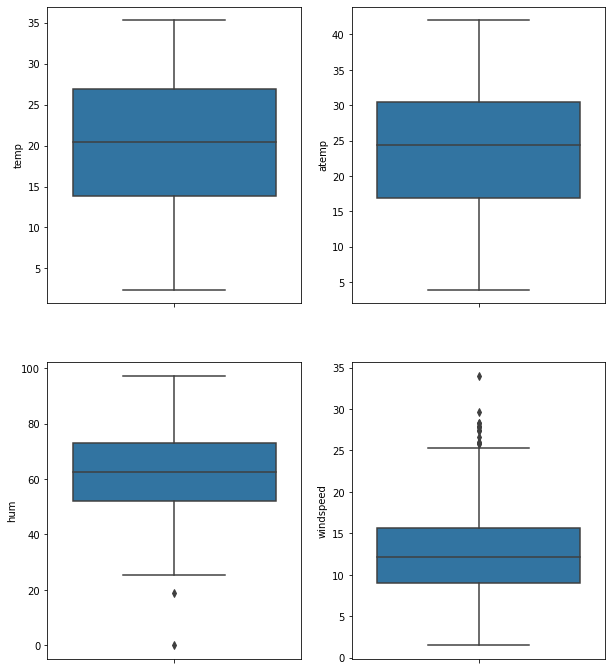

In [12]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sns.boxplot(y = 'temp', data = bike_share)
plt.subplot(2,2,2)
sns.boxplot(y = 'atemp', data = bike_share)
plt.subplot(2,2,3)
sns.boxplot(y = 'hum', data = bike_share)
plt.subplot(2,2,4)
sns.boxplot(y = 'windspeed', data = bike_share)
plt.show()

We visualized through box plot for these columns and it seems there are no such outliers for 'temp','atemp','hum','windspeed'

### Step 3 : Visualising the data 

In [13]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days        730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


#### Visualising Numerical Variables 

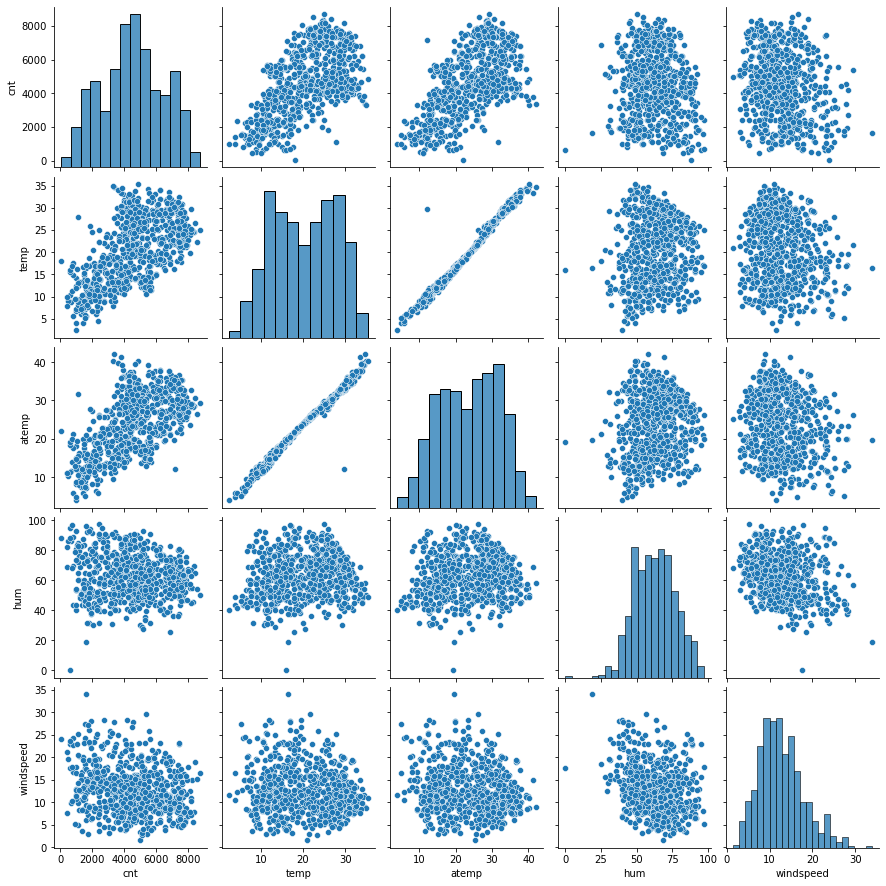

In [14]:
sns.pairplot(data=bike_share, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

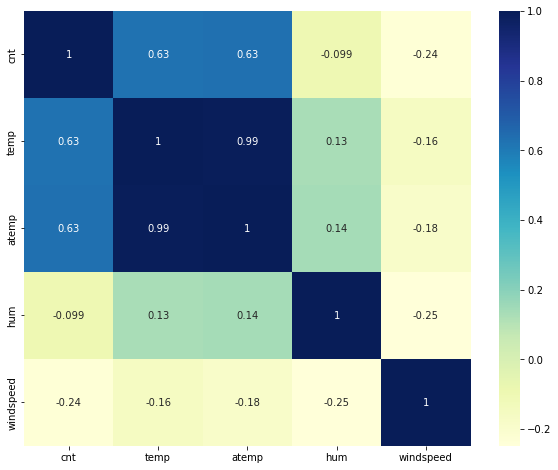

In [15]:
#checking correlation between the variables
plt.figure(figsize=(10,8))
sns.heatmap(bike_share[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations

##### .There is a high correlation between temp and atemp, which indicates that if temp increases then atemp will also increase

##### .And again temp and atemp has a good correlation with the variable cnt.

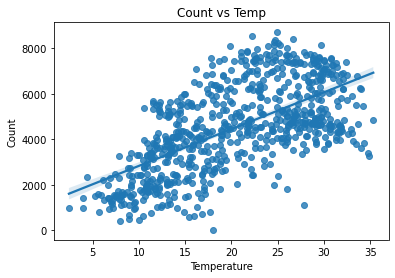

In [16]:
#checking for relation between cnt and temp
plt.title("Count vs Temp")
sns.regplot(data=bike_share,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

We see that the demand for bikes is positively correlated with temparature and on days with higher temparature people tend to rent more bikes. 

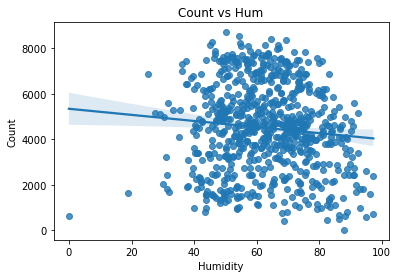

In [17]:
#checking the relation between cnt and hum
plt.title("Count vs Hum")
sns.regplot(data=bike_share,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

The data points for Hum values are more scattered but we can see that the demand for bikes are less if humidity increases.

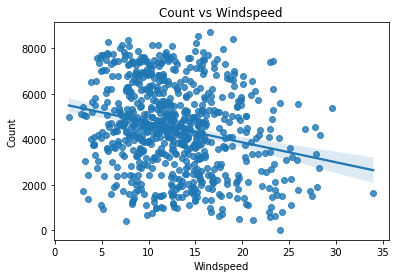

In [18]:
#checking the relation between cnt and windspeed
plt.title("Count vs Windspeed")
sns.regplot(data=bike_share,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

The demand for bikes is negatively correlated with windspeed. This indicates that if the windspeed is more there is a chance for bad weather and hence the demand for bikes is less.

#### Visualising Categorical Variables 

In [19]:
# creating a copy of the original dataset to analyse the categorical columns
bike_share_df = bike_share.copy()

In [20]:
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [21]:
# mapping categorical column with original value

bike_share_df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)

bike_share_df['yr'].replace({0: 2018, 1: 2019}, inplace=True)

bike_share_df['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)

bike_share_df['mnth'].replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                                   7: 'jul', 8: 'aug', 9: 'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace=True)

bike_share_df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)

bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,2018,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,2018,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,2018,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,2018,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


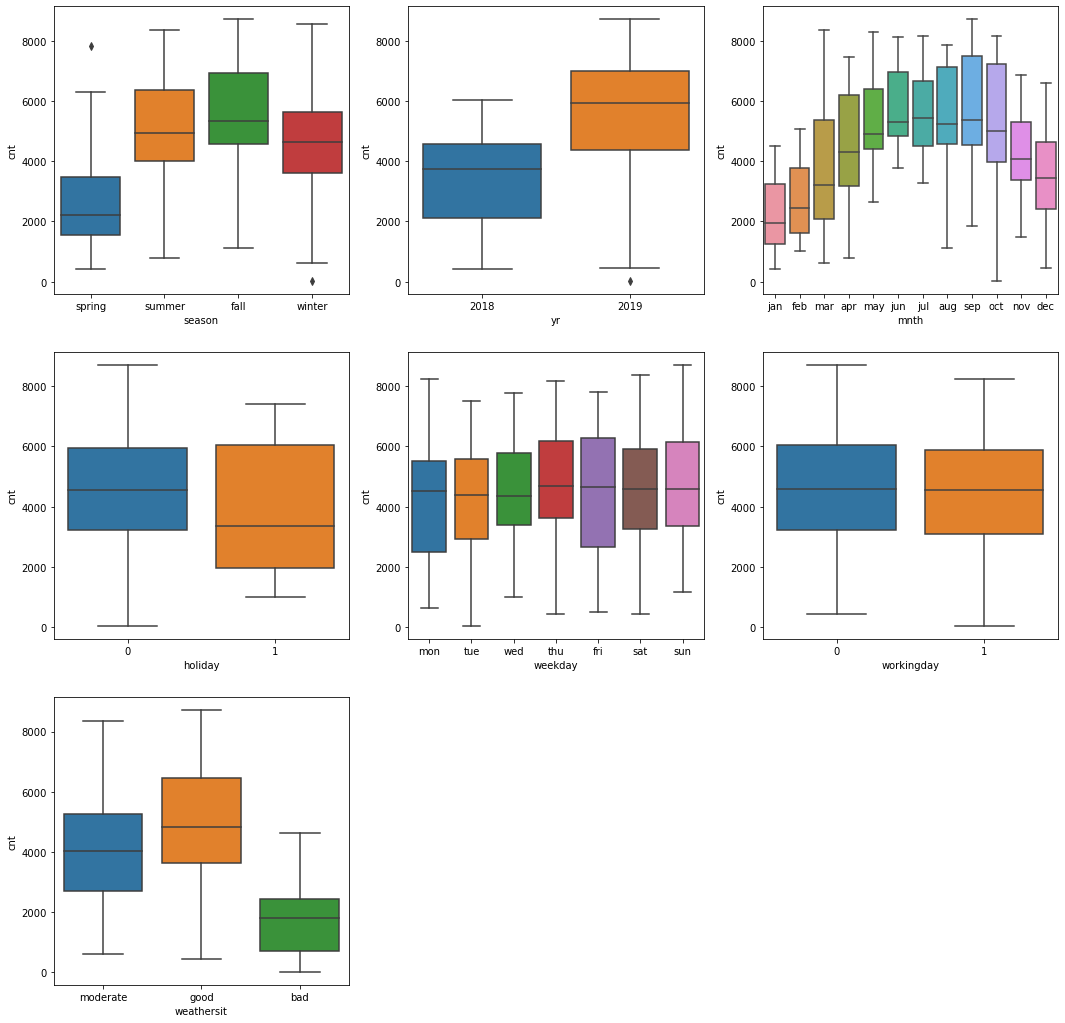

In [22]:
#plotting boxplot for categorical columns
plt.figure(figsize=(18, 18))
categorical_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for i in enumerate(categorical_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_share_df, x=i[1], y='cnt')
    
plt.show()

##### Observations

. Among the seasons fall has the highest demand for bikes.

. Demand for bikes is higher in the year 2019 compared to 2018.

. We see that the peak for bike demands is during September. The lowest demands   for bikes are during January and december as those months have long holidays.

. During holidays the mean demand for bikes decreses.

. Throughout the weekdays the mean for bike demands are somewhat same and same   goes for working days and weekends as well.

. The demands for bikes is higher on good weather conditions as people tend to   rent more bikes during good weather conditions rather then during moderate     and bad weather conditions

### Step 4: Data Preparation

##### Creating Dummy Variables for Categorical Columns 

In [23]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [24]:
# create dummies for season column and drop the first column
season_dummy = pd.get_dummies(bike_share_df['season'], drop_first=True)

# create dummies for mnth column and drop the first column
month_dummy = pd.get_dummies(bike_share_df['mnth'], drop_first=True)

# create dummies for weekday column and drop the first column
weekday_dummy = pd.get_dummies(bike_share_df['weekday'], drop_first=True)

# create dummies for weathersit column and let's not drop the first column to analyse every weather condition
weather_dummy = pd.get_dummies(bike_share_df['weathersit'])

In [25]:
#adding the dummies to the original bike_share dataframe
bike_share = pd.concat([bike_share, season_dummy, month_dummy, weekday_dummy, weather_dummy], axis = 1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
#checking the columns after adding the dummies
bike_share.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'bad', 'good', 'moderate'],
      dtype='object')

. As we have added the dummies for the variables in column season, month, weekday and weather condition, let us drop these columns as there is no need for the original columns.

. We will drop the first columns as (p-1) dummies can explain p categories.

.We wont drop the first column of weathersit to avoid losing information about severe weather situations.

In [27]:
# Drop 'season' as we have created the dummies for it
bike_share.drop(['season'], axis = 1, inplace = True)

# Drop 'mnth' as we have created the dummies for it
bike_share.drop(['mnth'], axis = 1, inplace = True)

# Drop 'weekday' as we have created the dummies for it
bike_share.drop(['weekday'], axis = 1, inplace = True)

# Drop 'weathersit' as we have created the dummies for it
bike_share.drop(['weathersit'], axis = 1, inplace = True)

In [28]:
#checking the dataset again
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Step 5 : Splitting the Data into Train and Test Sets 

In [29]:
# checking the shape of the dataset
bike_share.shape

(730, 32)

In [30]:
# creating Train and Test set by splitting the dataset with 70:30 ratio
df_train, df_test = train_test_split(bike_share, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


#### Rescaling the features 

In [32]:
#scaling the features
scaler= MinMaxScaler()

In [33]:
# Scaling  all the columns except the dummy variables and the yes-no variables
# creating a number variables list
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days']

# using fit_transform to scale the countinous numeric variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Dividing the scaled data into X and y Sets for Model Building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
#checking the X_train dataset
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [36]:
#checking y_train dataset
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Step 6 : Building Models 

#### Using RFE(Recursive feature elimination) approach to  select features coarsely

In [37]:
# Importing RFE and LinerRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Build a linear regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lr, step = 15)                  # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
#checking the columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', False, 3),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', False, 3),
 ('jun', False, 3),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', False, 3),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 2),
 ('thu', False, 3),
 ('tue', False, 3),
 ('wed', False, 3),
 ('bad', True, 1),
 ('good', True, 1),
 ('moderate', False, 3)]

In [40]:
#columns which were picked by RFE
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days', 'spring', 'winter', 'jan', 'sep', 'sat', 'bad', 'good'],
      dtype='object')

In [41]:
#columns not picked by RFE
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sun', 'thu', 'tue', 'wed', 'moderate'],
      dtype='object')

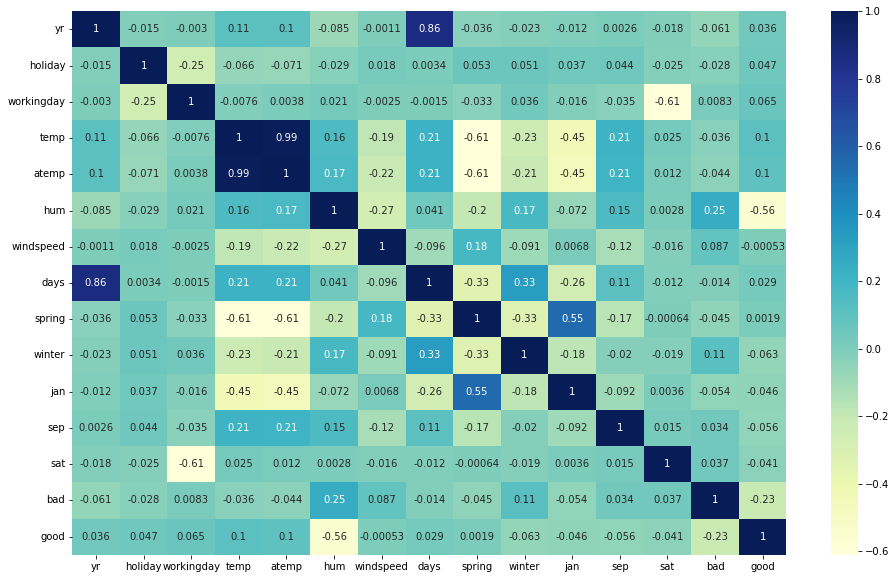

In [42]:
#Checking the correlation coefficient to see which variable are highly 

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[col_rfe].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Model Building using statsmodel, for manual selection of features and detailed statistics 

##### Model 1 

In [43]:
# Creatig X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,spring,winter,jan,sep,sat,bad,good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,0,0,0,0,0,0


In [44]:
# Adding a constant Variable
X_train_lr = sm.add_constant(X_train_rfe)

#Running the Linear model
lr_1 = sm.OLS(y_train,X_train_lr).fit()

#Checking the summary
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.26e-184
Time:                        15:52:17   Log-Likelihood:                 502.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     494   BIC:                            -905.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3308      0.038      8.800      0.000       0.257       0.405
yr             0.3107      0.027     11.336      0.000       0.257       0.365
holiday       -0.1085      0.028     -3.919      0.000      -0.163      -0.054
workingday    -0.0214      0.012     -1.770      0.077      -0.045       0.002
temp           0.3647      0.133      2.749      0.006       0.104       0.625
atemp          0.0707      0.139      0.508      0.611      -0.202       0.344
hum           -0.1256      0.038     -3.280      0.001      -0.201      -0.050
windspeed     -0.1731      0.027     -6.507      0.000      -0.225      -0.121
days          -0.1573      0.053     -2.971      0.003      -0.261      -0.053
spring        -0.1091      0.016     -6.956      0.000      -0.140      -0.078
winter         0.0870      0.017      4.983      0.000       0.053       0.121
jan           -0.0627      0.019     -3.340      0.001      -0.100      -0.026
sep            0.0849      0.016      5.332      0.000       0.054       0.116
sat           -0.0034      0.016     -0.216      0.829      -0.034       0.027
bad           -0.1974      0.025     -7.747      0.000      -0.247      -0.147
good           0.0596      0.011      5.533      0.000       0.038       0.081
==============================================================================
Omnibus:                       72.458   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.081
Skew:                          -0.758   Prob(JB):                     1.42e-36
Kurtosis:                       5.339   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculating VIF for 1st model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
print(vif)

      Features     VIF
3         temp  362.25
4        atemp  359.14
7         days   55.40
0           yr   22.65
5          hum   21.05
2   workingday    5.97
9       winter    4.59
6    windspeed    4.29
14        good    3.51
8       spring    3.13
12         sat    1.86
10         jan    1.83
11         sep    1.23
1      holiday    1.18
13         bad    1.15


##### Observation:

We have R_squared value as 0.838

sat has a high p-value (=0.829) > 0.05, so we will drop this column

##### Model 2 

In [46]:
# Dropping the nov column
X_train_rfe = X_train_rfe.drop('sat', axis = 1)
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,spring,winter,jan,sep,bad,good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,0,0,0,0,0


In [47]:
# Adding a constatnt variable
X_train_lr = sm.add_constant(X_train_rfe)

#Running the linear model
lr_2 = sm.OLS(y_train,X_train_lr).fit()

#Printing Summary
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.42e-185
Time:                        15:52:17   Log-Likelihood:                 502.78
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     495   BIC:                            -912.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3292      0.037      8.945      0.000       0.257       0.401
yr             0.3107      0.027     11.348      0.000       0.257       0.365
holiday       -0.1071      0.027     -3.983      0.000      -0.160      -0.054
workingday    -0.0197      0.009     -2.107      0.036      -0.038      -0.001
temp           0.3629      0.132      2.743      0.006       0.103       0.623
atemp          0.0726      0.139      0.524      0.601      -0.200       0.345
hum           -0.1257      0.038     -3.286      0.001      -0.201      -0.051
windspeed     -0.1730      0.027     -6.510      0.000      -0.225      -0.121
days          -0.1573      0.053     -2.973      0.003      -0.261      -0.053
spring        -0.1091      0.016     -6.962      0.000      -0.140      -0.078
winter         0.0869      0.017      4.985      0.000       0.053       0.121
jan           -0.0628      0.019     -3.345      0.001      -0.100      -0.026
sep            0.0849      0.016      5.338      0.000       0.054       0.116
bad           -0.1976      0.025     -7.772      0.000      -0.248      -0.148
good           0.0595      0.011      5.534      0.000       0.038       0.081
==============================================================================
Omnibus:                       71.850   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.365
Skew:                          -0.752   Prob(JB):                     3.36e-36
Kurtosis:                       5.329   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# checking VIF for 2nd model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

      Features     VIF
3         temp  360.69
4        atemp  358.26
7         days   55.34
0           yr   22.62
5          hum   20.19
9       winter    4.58
6    windspeed    4.26
2   workingday    3.72
13        good    3.45
8       spring    3.12
10         jan    1.82
11         sep    1.23
12         bad    1.15
1      holiday    1.12


##### Observation :

atemp has p_value (=0.601) > 0.05, let us drop this column first

temp,atemp,days,yr and hum has very high VIF, lets drop atemp and check 

##### Model 3 

In [49]:
# Dropping atemp column
X_train_rfe = X_train_rfe.drop('atemp',axis =1)
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,days,spring,winter,jan,sep,bad,good
653,1,0,1,0.509887,0.575354,0.300794,0.896978,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.791209,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.585165,1,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1.000000,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.662088,0,0,0,0,0,0


In [50]:
# Adding a constatnt variable
X_train_lr = sm.add_constant(X_train_rfe)

#Running the linear model
lr_3 = sm.OLS(y_train,X_train_lr).fit()

#Printing Summary
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.94e-186
Time:                        15:52:17   Log-Likelihood:                 502.64
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3304      0.037      9.002      0.000       0.258       0.402
yr             0.3122      0.027     11.478      0.000       0.259       0.366
holiday       -0.1074      0.027     -3.997      0.000      -0.160      -0.055
workingday    -0.0194      0.009     -2.081      0.038      -0.038      -0.001
temp           0.4303      0.031     14.062      0.000       0.370       0.490
hum           -0.1243      0.038     -3.259      0.001      -0.199      -0.049
windspeed     -0.1754      0.026     -6.717      0.000      -0.227      -0.124
days          -0.1604      0.053     -3.054      0.002      -0.264      -0.057
spring        -0.1092      0.016     -6.974      0.000      -0.140      -0.078
winter         0.0881      0.017      5.100      0.000       0.054       0.122
jan           -0.0636      0.019     -3.407      0.001      -0.100      -0.027
sep            0.0850      0.016      5.350      0.000       0.054       0.116
bad           -0.1986      0.025     -7.840      0.000      -0.248      -0.149
good           0.0597      0.011      5.560      0.000       0.039       0.081
==============================================================================
Omnibus:                       70.479   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.868
Skew:                          -0.740   Prob(JB):                     1.93e-35
Kurtosis:                       5.309   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# checking VIF for 3rd model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

      Features    VIF
6         days  54.74
0           yr  22.40
4          hum  19.66
3         temp  17.12
8       winter   4.50
5    windspeed   4.13
2   workingday   3.71
12        good   3.43
7       spring   3.12
9          jan   1.81
10         sep   1.23
11         bad   1.14
1      holiday   1.12


##### Observation:

all p_values are less then 0.05

days still has a very high VIF (=54.74)>5 , lets drop days column and check

##### Model 4 

In [52]:
# Dropping the days column
X_train_rfe = X_train_rfe.drop('days', axis=1)
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,jan,sep,bad,good
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0


In [53]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_rfe)

# Running the linear model
lr_4 = sm.OLS(y_train,X_train_lr).fit()

# Print summary
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.30e-185
Time:                        15:52:17   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     497   BIC:                            -914.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3092      0.036      8.509      0.000       0.238       0.381
yr             0.2331      0.008     28.058      0.000       0.217       0.249
holiday       -0.1093      0.027     -4.037      0.000      -0.163      -0.056
workingday    -0.0183      0.009     -1.944      0.052      -0.037       0.000
temp           0.4101      0.030     13.613      0.000       0.351       0.469
hum           -0.1298      0.038     -3.380      0.001      -0.205      -0.054
windspeed     -0.1693      0.026     -6.448      0.000      -0.221      -0.118
spring        -0.1038      0.016     -6.616      0.000      -0.135      -0.073
winter         0.0521      0.013      4.092      0.000       0.027       0.077
jan           -0.0458      0.018     -2.559      0.011      -0.081      -0.011
sep            0.0736      0.016      4.728      0.000       0.043       0.104
bad           -0.1971      0.026     -7.716      0.000      -0.247      -0.147
good           0.0581      0.011      5.372      0.000       0.037       0.079
==============================================================================
Omnibus:                       70.230   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.528
Skew:                          -0.725   Prob(JB):                     1.14e-36
Kurtosis:                       5.385   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# checking VIF for 4th model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

      Features    VIF
4          hum  18.32
3         temp  15.54
5    windspeed   4.13
2   workingday   3.71
11        good   3.34
6       spring   3.11
7       winter   2.23
0           yr   2.06
8          jan   1.66
9          sep   1.17
10         bad   1.14
1      holiday   1.12


#### Observations:

all the p-values are almost less then 0.05

hum still has a high VIF(=18.32)>5, lets drop hum and check

##### Model 5 

In [55]:
# dropping the hum column
X_train_rfe = X_train_rfe.drop('hum', axis=1)
X_train_rfe.head()

,yr,holiday,workingday,temp,windspeed,spring,winter,jan,sep,bad,good
653,1,0,1,0.509887,0.300794,0,1,0,0,0,1
576,1,0,1,0.815169,0.264686,0,0,0,0,0,1
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0
728,1,0,1,0.245101,0.663106,1,0,0,0,0,1
482,1,0,0,0.395666,0.188475,0,0,0,0,0,0


In [56]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_rfe)

# Running the linear model
lr_5 = sm.OLS(y_train,X_train_lr).fit()

# Print summary
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.37e-184
Time:                        15:52:17   Log-Likelihood:                 492.09
No. Observations:                 510   AIC:                            -960.2
Df Residuals:                     498   BIC:                            -909.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2196      0.025      8.747      0.000       0.170       0.269
yr             0.2361      0.008     28.288      0.000       0.220       0.252
holiday       -0.1116      0.027     -4.081      0.000      -0.165      -0.058
workingday    -0.0207      0.009     -2.187      0.029      -0.039      -0.002
temp           0.3878      0.030     13.057      0.000       0.329       0.446
windspeed     -0.1454      0.026     -5.689      0.000      -0.196      -0.095
spring        -0.1061      0.016     -6.697      0.000      -0.137      -0.075
winter         0.0439      0.013      3.480      0.001       0.019       0.069
jan           -0.0484      0.018     -2.682      0.008      -0.084      -0.013
sep            0.0699      0.016      4.450      0.000       0.039       0.101
bad           -0.2114      0.025     -8.305      0.000      -0.261      -0.161
good           0.0793      0.009      8.903      0.000       0.062       0.097
==============================================================================
Omnibus:                       69.408   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.785
Skew:                          -0.731   Prob(JB):                     9.01e-35
Kurtosis:                       5.289   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# checking VIF for 5th model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

      Features   VIF
3         temp  5.38
4    windspeed  4.04
2   workingday  3.46
10        good  2.88
5       spring  2.38
0           yr  2.06
7          jan  1.59
6       winter  1.46
8          sep  1.16
9          bad  1.12
1      holiday  1.11


#### Observation: 

all the p-values are less then 0.05

temp has a higher VIF than 5, but if we check we see that temp has a positive coefficient(=0.38)

Earlier we have observed that windspeed has a negative correlation with the target variable and it has negative coefficient, so lets drop the column and see if we can further improve the model.

##### Model 6 

In [58]:
# dropping the windspeed column
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)
X_train_rfe.head()

,yr,holiday,workingday,temp,spring,winter,jan,sep,bad,good
653,1,0,1,0.509887,0,1,0,0,0,1
576,1,0,1,0.815169,0,0,0,0,0,1
426,1,0,0,0.442393,1,0,0,0,0,0
728,1,0,1,0.245101,1,0,0,0,0,1
482,1,0,0,0.395666,0,0,0,0,0,0


In [59]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_rfe)

# Running the linear model
lr_6 = sm.OLS(y_train,X_train_lr).fit()

# Print summary
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          9.28e-179
Time:                        15:52:18   Log-Likelihood:                 476.03
No. Observations:                 510   AIC:                            -930.1
Df Residuals:                     499   BIC:                            -883.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1562      0.023      6.735      0.000       0.111       0.202
yr             0.2347      0.009     27.289      0.000       0.218       0.252
holiday       -0.1146      0.028     -4.065      0.000      -0.170      -0.059
workingday    -0.0208      0.010     -2.125      0.034      -0.040      -0.002
temp           0.4158      0.030     13.770      0.000       0.356       0.475
spring        -0.1090      0.016     -6.681      0.000      -0.141      -0.077
winter         0.0540      0.013      4.189      0.000       0.029       0.079
jan           -0.0337      0.018     -1.832      0.068      -0.070       0.002
sep            0.0773      0.016      4.793      0.000       0.046       0.109
bad           -0.2261      0.026     -8.663      0.000      -0.277      -0.175
good           0.0782      0.009      8.512      0.000       0.060       0.096
==============================================================================
Omnibus:                       75.908   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.760
Skew:                          -0.766   Prob(JB):                     4.60e-41
Kurtosis:                       5.528   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# checking VIF for 6th model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

     Features   VIF
3        temp  4.47
2  workingday  3.39
9        good  2.86
0          yr  2.05
4      spring  2.01
6         jan  1.59
5      winter  1.41
7         sep  1.15
1     holiday  1.11
8         bad  1.10


#### Observation :

VIF for all has gone down to less then 5 and thus accepted

p-value for all is lower then 0.05 , except for jan. So lets drop that column and check

##### Model 7 

In [61]:
# dropping the windspeed column
X_train_rfe = X_train_rfe.drop('jan', axis=1)
X_train_rfe.head()

,yr,holiday,workingday,temp,spring,winter,sep,bad,good
653,1,0,1,0.509887,0,1,0,0,1
576,1,0,1,0.815169,0,0,0,0,1
426,1,0,0,0.442393,1,0,0,0,0
728,1,0,1,0.245101,1,0,0,0,1
482,1,0,0,0.395666,0,0,0,0,0


In [62]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_rfe)

# Running the linear model
lr_7 = sm.OLS(y_train,X_train_lr).fit()

# Print summary
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.01e-179
Time:                        15:52:18   Log-Likelihood:                 474.32
No. Observations:                 510   AIC:                            -928.6
Df Residuals:                     500   BIC:                            -886.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1481      0.023      6.489      0.000       0.103       0.193
yr             0.2342      0.009     27.181      0.000       0.217       0.251
holiday       -0.1151      0.028     -4.074      0.000      -0.171      -0.060
workingday    -0.0209      0.010     -2.128      0.034      -0.040      -0.002
temp           0.4273      0.030     14.432      0.000       0.369       0.485
spring        -0.1167      0.016     -7.385      0.000      -0.148      -0.086
winter         0.0568      0.013      4.428      0.000       0.032       0.082
sep            0.0767      0.016      4.743      0.000       0.045       0.108
bad           -0.2238      0.026     -8.563      0.000      -0.275      -0.172
good           0.0789      0.009      8.580      0.000       0.061       0.097
==============================================================================
Omnibus:                       73.859   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.987
Skew:                          -0.746   Prob(JB):                     5.00e-40
Kurtosis:                       5.508   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# checking VIF for 7th model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

     Features   VIF
3        temp  4.44
2  workingday  3.37
8        good  2.85
0          yr  2.04
4      spring  1.47
5      winter  1.41
6         sep  1.15
1     holiday  1.11
7         bad  1.10


#### Observation:

Here all the VIF seems to be loweer then 5 and we can accept that.

p-values for all the feature is less than 0.05

R-squared value = 0.819

Adj. R-squared = 0.816

We will go with Model 7 as our final model and try predicting the test set. Model 7 has no Multicollinearity(high VIF) variable and no insignificant features.

The difference between R-squared and Adjusted R-squaredvalues for this model is very low, which also means that there are no additional parameters that can be removed from this model

#### We will now go ahead and make our predictions using model 7 

### Step 7: Residual Analysis of the train data 

We will plot the histogram of the error terms and see if they are normally distributed or not.

In [64]:
y_train_pred = lr_7.predict(X_train_lr)

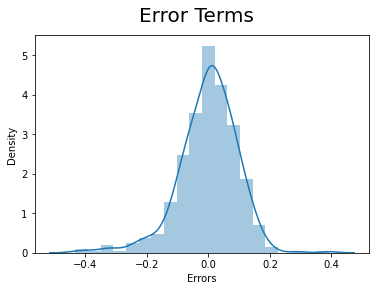

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.show()

Errors are normally distributed here with mean at 0.

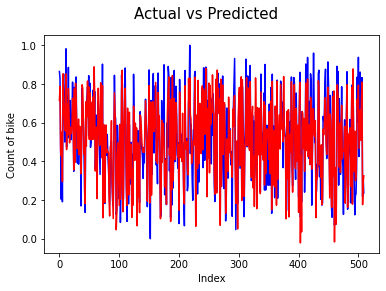

In [66]:
# Ploting actual vs predicted datapoints
c = [i for i in range(0,len(X_train_lr),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Count of bike')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems okay.


## Step 8: Making Predictions and evaluation using the final Model 

##### Applying scaling on the test sets 

In [67]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [68]:
# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days']

# scaler transform on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.252747,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.734890,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0.410714,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.303571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0.208791,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [69]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.488704,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.293496,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.233516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.478022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.736951,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [70]:
# create X_test, y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [72]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [73]:
X_train_rfe.head()

,yr,holiday,workingday,temp,spring,winter,sep,bad,good
653,1,0,1,0.509887,0,1,0,0,1
576,1,0,1,0.815169,0,0,0,0,1
426,1,0,0,0.442393,1,0,0,0,0
728,1,0,1,0.245101,1,0,0,0,1
482,1,0,0,0.395666,0,0,0,0,0


In [74]:
# Adding constant variable to test dataframe
X_test_lr = sm.add_constant(X_test)
X_test_lr.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,days,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [75]:
# Creating X_test_lm dataframe by dropping variables from X_test_lr
drop_col = ['atemp','hum','windspeed','days','summer','aug','dec','feb','jan','jul','jun','mar','may','nov','oct','mon','sat','sun','thu','tue','wed','moderate']
X_test_lr = X_test_lr.drop(drop_col, axis = 1)
X_test_lr.head()

,const,yr,holiday,workingday,temp,spring,winter,sep,bad,good
184,1.0,0,1,0,0.831783,0,0,0,0,0
535,1.0,1,0,1,0.901354,0,0,0,0,1
299,1.0,0,0,0,0.511964,0,1,0,0,0
221,1.0,0,0,1,0.881625,0,0,0,0,1
152,1.0,0,0,0,0.817246,0,0,0,0,1


In [76]:
# making prediction using final model
y_test_pred = lr_7.predict(X_test_lr)

In [77]:
# evaluate the R-squared value for train data
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8189659041017161

In [78]:
# evaluate the R-squared value
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8108463729009764

#####  r2-score for trained data = 0.818
#####  r2-score for test data = 0.810

## Step 9: Model Evaluation 

Text(0, 0.5, 'y_test_pred')

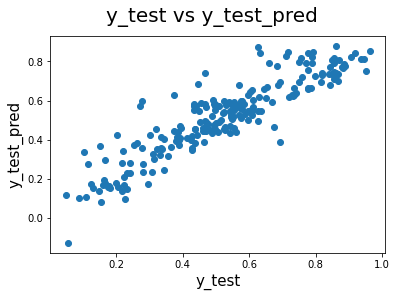

In [79]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_test_pred', fontsize = 15) 

In [80]:
round(lr_7.params,4)

const         0.1481
yr            0.2342
holiday      -0.1151
workingday   -0.0209
temp          0.4273
spring       -0.1167
winter        0.0568
sep           0.0767
bad          -0.2238
good          0.0789
dtype: float64

##### From this we can get the equation for the best fitted line :

###### cnt = 0.1481 + 0.2342 x year - 0.1151 x holiday - 0.0209 x workingday + 0.4273 x temp - 0.1167 x spring + 0.0568 x winter + 0.0767 x sep - 0.2238 x bad + 0.0789 x good

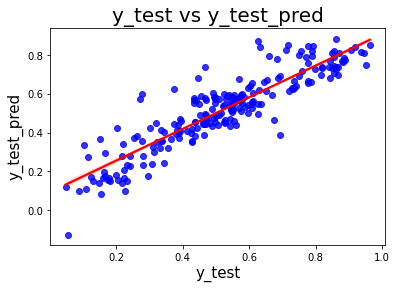

In [81]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=70, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_test_pred', fontsize=15)
plt.show()

## Step 10: Interpretation of Results 

We have created a decent model , even though there are room for improvements.

##### Analysing the final Model:

Company should focus on expanding bussiness during September

Company should focus on expanding during Spring and Winter

There seems to be higher demand of bikes on holidays and companies can focus on expandig their customer base during that period of time.

Weather plays a important role in the number of bikes being booked. And it seems that the number of booking is less during bad and higher during good weather.

##### Significant Variables to predict the demand for bikes are:

.yr

.holiday

.workingday

.temp

.spring

.winter

.sep

.bad and good weathers